### Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import KFold,train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


%matplotlib inline

### Load The Dataset and cleaning it 
see if any null values were found or  data type of the column is not correct

In [14]:
df=pd.read_csv('used_cars_data.csv')

In [15]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          792 non-null    object
 1   model          792 non-null    object
 2   price (eur)    792 non-null    int64 
 3   engine         792 non-null    object
 4   year           792 non-null    int64 
 5   mileage (kms)  792 non-null    int64 
 6   fuel           792 non-null    object
 7   gearbox        792 non-null    object
 8   location       792 non-null    object
dtypes: int64(3), object(6)
memory usage: 55.8+ KB


In [18]:
print(f"Number of Null Values = {df.isna().sum().sum()}")

print(f"Number of Duplicated Rows = {df.duplicated().sum()}")

Number of Null Values = 0
Number of Duplicated Rows = 1


- ##### The data is Clean no null value found 
- ##### only one  repeated row were found and 
       - this row will be deleted
- ##### each 0column has it's corrected datatype

## Drop the Duplicated Rows

In [19]:
df[df.duplicated()]

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
790,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró


In [21]:
df[df['mileage (kms)']==162895].head(2)

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
690,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró
790,Volkswagen,Tiguan,14990,2.0 TDI 177cv DSG 4x4 Sport BMotion Tech,2014,162895,Diésel,Automatica,Mataró


In [22]:
df.shape

(792, 9)

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(791, 9)

# Explore The DataSet
### Description of the dataset

In [25]:
df.describe()

,price (eur),year,mileage (kms)
count,791.000000,791.00000,791.000000
mean,15974.627054,2016.40708,83128.117573
std,6988.669751,2.45231,46144.272462
min,4990.000000,2004.00000,1258.000000
25%,11330.000000,2015.00000,47137.000000
50%,14990.000000,2017.00000,80000.000000
75%,18490.000000,2018.00000,116150.000000
max,82580.000000,2021.00000,220000.000000


- ###### the Standard divination `price`  column it's hight ,that indicates that most of the prices in the data set are very far from the mean 


### Is The Data Correlated to each other  

<AxesSubplot:>

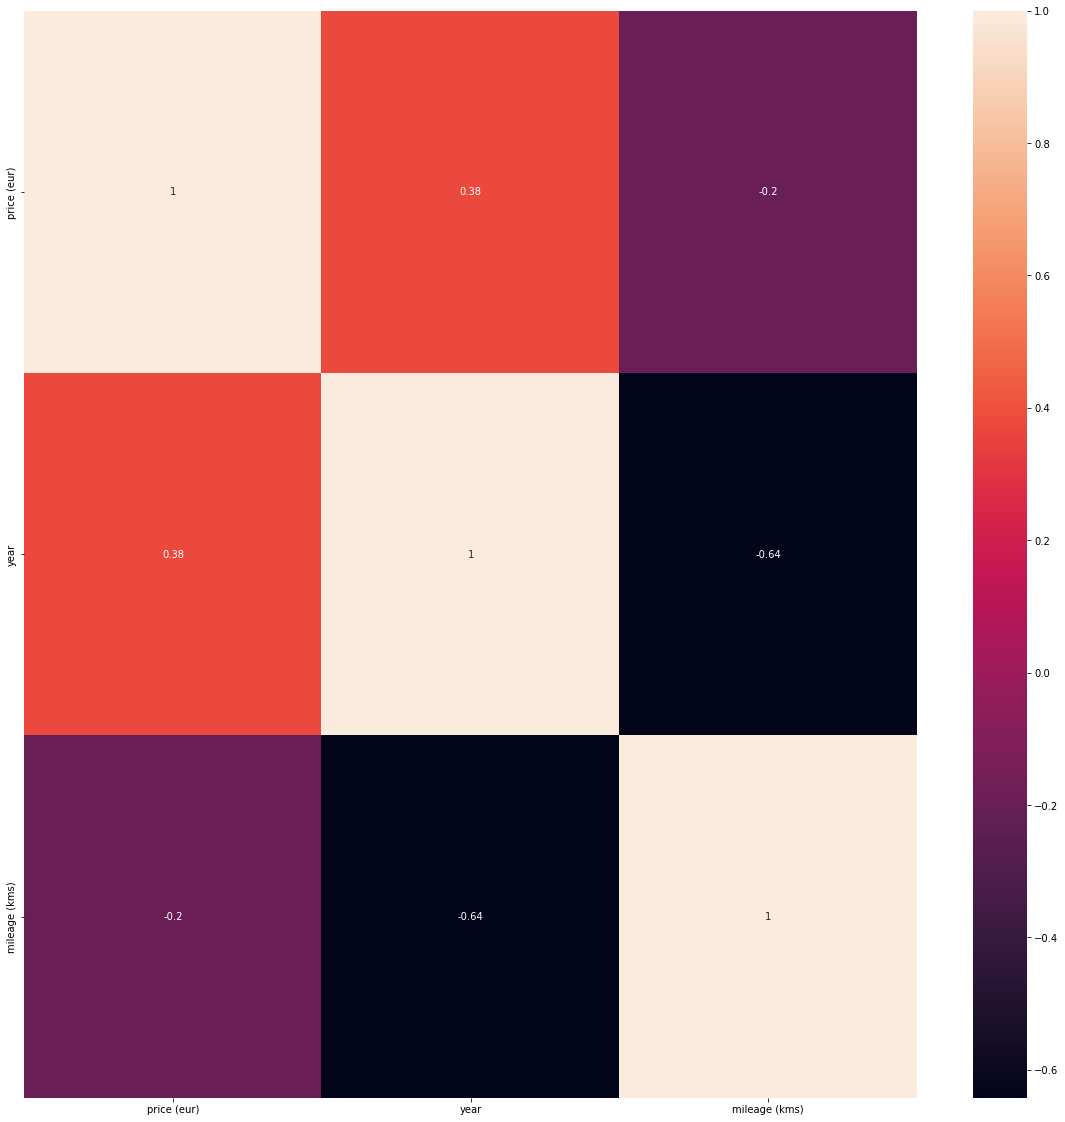

In [26]:
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(),annot=True)

 
- ###### price and Year Are Correlated To each other  

### What Is the Covariance and Correlation of all the dataset  

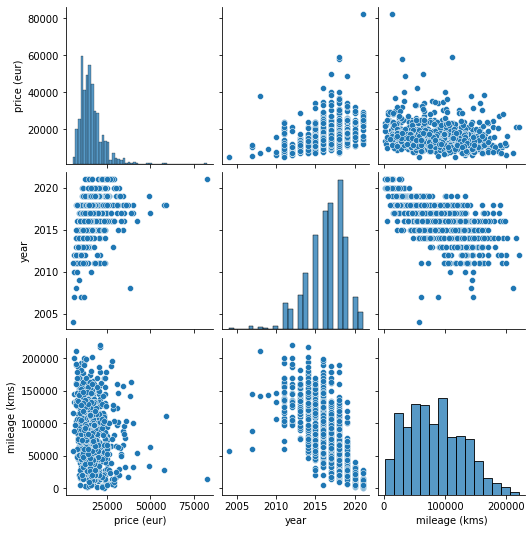

In [28]:
sns.pairplot(df)

- ###### The `year` have positive covariance  with  `price`

In [30]:
df.head()

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1


#### What Is the Top Five Brand In The Dataset

<AxesSubplot:>

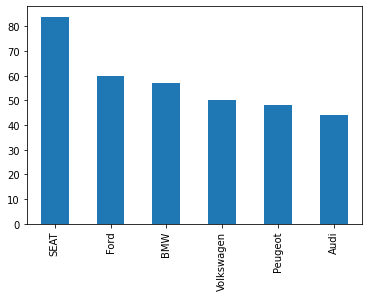

In [36]:
df['brand'].value_counts()[0:6].plot(kind='bar')

# What Brand is Higher in the Price ?

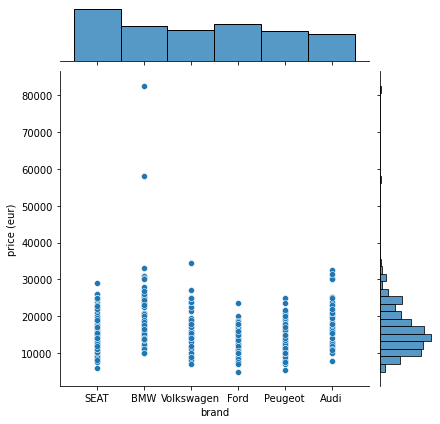

In [47]:
sns.jointplot(x='brand',y='price (eur)',data=df[df['brand'].isin(df['brand'].value_counts()[0:6].keys().to_list())])

In [49]:
df[df['brand'].isin(df['brand'].value_counts()[0:6].keys().to_list())].groupby(['brand'])['price (eur)'].mean()

brand
Audi          18192.272727
BMW           21667.368421
Ford          13809.833333
Peugeot       13979.166667
SEAT          14828.452381
Volkswagen    16783.000000
Name: price (eur), dtype: float64

- ###### BMW Is the higher one


# Train The Models

In [67]:
def Metrcis(y_pred,y_true,prnt=False):
    'Function  Jst Wrap All the metrics that iam using'
    acc=metrics.accuracy_score(y_true,y_pred)
    f1_score=metrics.f1_score(y_true,y_pred,average='macro')
    recall=metrics.recall_score(y_true,y_pred,average='macro')
    precs=metrics.precision_score(y_true,y_pred,average='macro')
    conf_matrix=metrics.confusion_matrix(y_true,y_pred)
    if prnt:
        print(f"\n Accuracy ={acc} \n F1_Score={f1_score} \n recall={recall} \n precs={precs} \n Conf_Matrix={conf_matrix}")

    return acc,f1_score,recall,precs,conf_matrix


def plot_roc_auc(list_of_models,x,y,list_of_model_names,prnt=None):
    for i,model in enumerate( list_of_models):
        metrics.plot_roc_curve(model, x, y) 
        plt.title(list_of_model_names[i])
        print(list_of_model_names[i]+'\n')
        Metrcis(model.predict(x),y,prnt=True)

   








 

In [68]:

def convert(df,columns):

    for column in columns:
        dic={ val:i for i,val in enumerate(df[column].unique())}
        df[column]=df[column].map(dic)



In [69]:
convert(df,['brand', 'model', 'engine','fuel', 'gearbox', 'location'])

In [70]:
df

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,0,0,8990,0,2016,67000,0,0,0
1,1,1,9990,1,2014,104868,1,0,1
2,2,2,13490,2,2011,137566,1,1,1
3,3,3,24990,3,2018,44495,0,0,1
4,4,4,10460,4,2016,69800,0,0,2
...,...,...,...,...,...,...,...,...,...
786,10,12,15990,106,2018,21404,0,0,3
787,3,3,13990,692,2016,84040,1,0,3
788,6,6,24990,7,2018,65872,0,0,1
789,26,51,17990,509,2019,28830,0,0,4


In [71]:
y=df['model']
x=df.drop(['model'],axis=1)


### Select Best Model Depending On The Acc Score, Also The Model Will have it's default Parameters

In [75]:
model_svc=SVC()
model_knn=KNeighborsClassifier()
model_lr=LogisticRegression()
model_dt=DecisionTreeClassifier()
model_rf=RandomForestClassifier()
model_b=GaussianNB()

list_of_models=[model_svc,model_lr,model_knn,modet_dt,model_rf,model_b]
list_of_model_names=['SVC','LOGETSTIC REG','KNN','DT','RANDOM FOREST','BYES']
X_train,X_test,y_train,y_test=train_test_split(x,y)



kfol=KFold(n_splits=10)
dic_k={'KNN':{'acc_fold':[],'f1_score_fold':[]},'LR':{'acc_fold':[],'f1_score_fold':[]},'SVM':{'acc_fold':[],'f1_score_fold':[]},'DT':{'acc_fold':[],'f1_score_fold':[]},'RF':{'acc_fold':[],'f1_score_fold':[]},'B':{'acc_fold':[],'f1_score_fold':[]}}

for t,te in kfol.split(X_train,y_train):
    train_x=X_train.iloc[t]
    train_y=y_train.iloc[t]

    val_x=X_train.iloc[te]
    val_y=y_train.iloc[te]

    print('Support Vector')
    model_svc.fit(train_x,train_y)
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_svc.predict(val_x),val_y)
    dic_k['SVM']['acc_fold'].append(acc)
    dic_k['SVM']['f1_score_fold'].append(f1_score)

    
    print('KNN')
    model_knn.fit(train_x,train_y)
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_knn.predict(val_x),val_y)
    dic_k['KNN']['acc_fold'].append(acc)
    dic_k['KNN']['f1_score_fold'].append(f1_score)



    print('LR')
    model_lr.fit(train_x,train_y);
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_lr.predict(val_x),val_y)
    dic_k['LR']['acc_fold'].append(acc)
    dic_k['LR']['f1_score_fold'].append(f1_score)


    print('DT')
    model_dt.fit(train_x,train_y);
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_dt.predict(val_x),val_y)
    dic_k['DT']['acc_fold'].append(acc)
    dic_k['DT']['f1_score_fold'].append(f1_score)

    print('RF')
    model_rf.fit(train_x,train_y);
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_rf.predict(val_x),val_y)
    dic_k['RF']['acc_fold'].append(acc)
    dic_k['RF']['f1_score_fold'].append(f1_score)


    print('B')
    model_b.fit(train_x,train_y);
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_b.predict(val_x),val_y)
    dic_k['B']['acc_fold'].append(acc)
    dic_k['B']['f1_score_fold'].append(f1_score)

print('-------------------------')
   


for k,v in dic_k.items():
    for k_n,v_n in dic_k[k].items():
        dic_k[k][k_n]=np.array(dic_k[k][k_n]).mean()
pd.DataFrame(dic_k)

Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF
B
-------------------------


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

,KNN,LR,SVM,DT,RF,B
acc_fold,0.057232,0.052260,0.028644,0.320480,0.283333,0.205650
f1_score_fold,0.028558,0.007477,0.002281,0.185994,0.157840,0.108877


> ######  This Data is Hard To train Classification model with it 